# 1. Titanic (Regression)
* https://www.kaggle.com/c/titanic/overview
* 출력을 csv파일로 저장하여 함께 제출
* submit predictions에 테스트해 볼 것!
* 어떠한 알고리즘을 사용하여도 무방함
* 참조: https://www.kaggle.com/alexisbcook/getting-started-with-titanic

In [1]:
import numpy as np 
import pandas as pd
import pandas_profiling as pp
import matplotlib
matplotlib.use('TkAgg')  #사용한 컴퓨터 한경 문제로 추가적인 설정 
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [2]:
train_data = pd.read_csv('./titanic/train.csv')
test_data = pd.read_csv('./titanic/test.csv')

In [3]:

train_data=train_data.drop("PassengerId", axis=1) 
train_data=train_data.drop("Name", axis=1) 
train_data=train_data.drop("Ticket", axis=1) 
train_data=train_data.drop("Cabin", axis=1) 
#train_data=train_data.drop("Embarked", axis=1) 
#train_data=train_data.drop("Fare", axis=1)

#test_data=test_data.drop("Fare", axis=1)
test_data=test_data.drop("PassengerId", axis=1)
test_data=test_data.drop("Name", axis=1)
test_data=test_data.drop("Ticket", axis=1)
test_data=test_data.drop("Cabin", axis=1)
#test_data=test_data.drop("Embarked", axis=1) 

"""생존여부와 유의미한 상관관계를 가지지 않을 것으로 예상되는 특성들을 제거"""

'생존여부와 유의미한 상관관계를 가지지 않을 것으로 예상되는 특성들을 제거'

In [4]:
train_data.Sex=train_data.Sex.map({'female':0, 'male':1 ,'nan':'NaN'})
test_data.Sex=test_data.Sex.map({'female':0, 'male':1 ,'nan':'NaN'})
train_data.Embarked=train_data.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})
test_data.Embarked=test_data.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
"""문자열 정보를 숫자로 변환"""
y_train=train_data.Survived
x_train=train_data.drop(["Survived"], axis=1)
x_test=test_data
"""data와 target을 분리  test data의 taget은 주어지지 않음"""

'data와 target을 분리  test data의 taget은 주어지지 않음'

In [5]:


median_age_male=x_train[x_train['Sex']==1]['Age'].median()
    #std_age_male=x_train[train_data['Sex']==1]['Age'].std()
    
median_age_female=x_train[x_train['Sex']==0]['Age'].median()
    #std_age_male=x_train[x_train['Sex']==0]['Age'].std()
    
"""training data에서 생존여부와 유의미한 상관관계를 가진 성별의 경우 남자 여자 평균 나이를 따로 계산하여 없는 값을 대체 """    
x_train.loc[(x_train.Age.isnull()) & (x_train['Sex']==1),'Age']=median_age_male
    
x_train.loc[(x_train.Age.isnull()) & (x_train['Sex']==0),'Age']=median_age_female
    
x_test.loc[(x_test.Fare.isnull()==True)]=17.  
    
x_train.loc[(x_train.Embarked.isnull())==True]=0
    
x_test.loc[(x_test.Embarked.isnull())==True]=0
    
    
x_test.loc[(x_test.Age.isnull()) & (x_test['Sex']==1),'Age']=median_age_male
    
x_test.loc[(x_test.Age.isnull()) & (x_test['Sex']==0),'Age']=median_age_female
    
   

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
y_pred.shape

(418,)

In [8]:
test_data=pd.read_csv('./titanic/test.csv')
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": y_pred
    })

In [9]:
submission.to_csv('submission2.csv', index=False)

* 주의! csv파일과 notebook 코드 모두를 제출하여야 한다.

# 2. Image classification with CNN
* cnn을 이용하여 다음 이미지를 분류하여라.
* 인풋 데이터는 rgb 정보를 가지고 있다.
* 코드, 결과, 보고서를 함께 제출하여야 한다.

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

# dataset and transformation
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models

# display images
from torchvision import utils
import matplotlib.pyplot as plt
%matplotlib inline

# utils
import numpy as np
import time
import copy

In [11]:
batch_size = 100

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False
)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
class Yal(nn.Module):
    def __init__(self):
        super().__init__()
        """주석으로 출력의 사이즈를 표기 """
        self.block1=nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),   #(32 32 32)
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), #(32 32 64 )
            nn.ReLU(),
            nn.MaxPool2d(2, 2), #(16 16 64)
            nn.BatchNorm2d(64)
        )

        self.block2=nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), #(16 16 128)
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1), #(16 16 128)
            nn.ReLU(),
            nn.MaxPool2d(2, 2), #(8 8 128)
            nn.BatchNorm2d(128)
        )
        
        self.block3=nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1), #(8 8 256)
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1), #(8 8 256)
            nn.MaxPool2d(2, 2), #(4 4 256 )
            nn.BatchNorm2d(256)
        )
 
        self.fc1=nn.Linear(256*4*4, 1024) #(1024)
       
        self.fc2=nn.Linear(1024, 512) #(512)
    
        self.fc3=nn.Linear(512, 10) #(10)
        
    def forward(self, x):
        x=self.block1(x)   
        x=self.block2(x)
        x=self.block3(x)
        x=torch.flatten(x,1)  #fully connected layer와 연결하기 위해 1차원으로 펴줌
        x=self.fc1(x)
        x=F.relu(x)
        x=self.fc2(x)
        x=F.relu(x)
        x=self.fc3(x)
        
        return x

In [13]:
torch.cuda.manual_seed_all(10) #동일한 조건으로 다른 구조의 모델의 성능을 비교하기 위해 난수 생성 seed 설정 (gpu and cpu)
torch.manual_seed(10)

In [14]:
model=Yal()
if torch.cuda.is_available(): #model parameter들을 gpu로 전달
    model.cuda()


In [15]:
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [17]:
num_epochs = 20

loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader): # batch size 100이므로 epoch 당 iteration=50000/100=500 번 
        images, labels = images.to(device), labels.to(device) #gpu 환경에서 계산
    
        prediction = model(images)
        
        loss = criterion(prediction, labels)
        
        optimizer.zero_grad()
    
        loss.backward()
        
        optimizer.step()
     
        if ((i+1)%100==0): # iteration 100번마다 test data로 loss, accuracy 계산하여 학습 경향 확인
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                prediction = model(images) 
            
                predictions = torch.max(prediction, 1)[1].to(device) 
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(i)
            accuracy_list.append(accuracy)
            print("Epoch:{}, Iteration: {}, TestLoss: {}, TestAccuracy: {}%".format(epoch+1,i+1, loss.data, accuracy))
    

Epoch:1, Iteration: 100, TestLoss: 1.3451842069625854, TestAccuracy: 47.06999969482422%
Epoch:1, Iteration: 200, TestLoss: 1.4142802953720093, TestAccuracy: 56.94999694824219%
Epoch:1, Iteration: 300, TestLoss: 1.1154427528381348, TestAccuracy: 61.029998779296875%
Epoch:1, Iteration: 400, TestLoss: 1.0431290864944458, TestAccuracy: 63.81999969482422%
Epoch:1, Iteration: 500, TestLoss: 0.747795045375824, TestAccuracy: 67.08999633789062%
Epoch:2, Iteration: 100, TestLoss: 0.90692538022995, TestAccuracy: 68.58999633789062%
Epoch:2, Iteration: 200, TestLoss: 0.75983065366745, TestAccuracy: 72.33000183105469%
Epoch:2, Iteration: 300, TestLoss: 0.5888379216194153, TestAccuracy: 73.16999816894531%
Epoch:2, Iteration: 400, TestLoss: 0.5444296002388, TestAccuracy: 73.70999908447266%
Epoch:2, Iteration: 500, TestLoss: 0.7795976996421814, TestAccuracy: 75.68999481201172%
Epoch:3, Iteration: 100, TestLoss: 0.41785985231399536, TestAccuracy: 76.58000183105469%
Epoch:3, Iteration: 200, TestLoss: 0.6

Epoch:19, Iteration: 500, TestLoss: 0.049460314214229584, TestAccuracy: 80.83999633789062%
Epoch:20, Iteration: 100, TestLoss: 0.010558966547250748, TestAccuracy: 80.72000122070312%
Epoch:20, Iteration: 200, TestLoss: 0.04885871708393097, TestAccuracy: 81.20999908447266%
Epoch:20, Iteration: 300, TestLoss: 0.0480441190302372, TestAccuracy: 81.38999938964844%
Epoch:20, Iteration: 400, TestLoss: 0.00256745726801455, TestAccuracy: 81.04999542236328%
Epoch:20, Iteration: 500, TestLoss: 0.05653274431824684, TestAccuracy: 80.98999786376953%


In [18]:
test_loss_list=[i.cpu() for i in loss_list]
test_accuracy_list=[i.cpu() for i in accuracy_list]

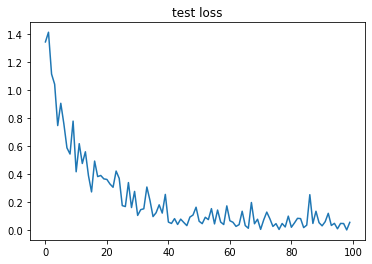

In [22]:
plt.plot([i for i in range(100)], test_loss_list)
plt.title("test loss")
plt.show()

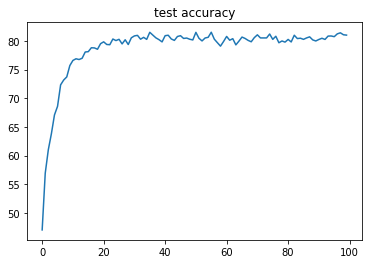

In [21]:
plt.plot([i for i in range(100)], test_accuracy_list)
plt.title("test accuracy")
plt.show()

# Cifar10 CNN 보고서 

처음 모델을 정할때 convolution layerf를 여러번 쌓아 32*32*3 input tensor로 부터 최대한 많은 정보를 추출하여 정확도를 높이고자 하였다. 
일반적으로 layer를 많이 쌓을 경우 backpropagation을 할때 기울기가 뒤 레이어로 갈수록 작아져 학습이 되지 않는 gradient vanishing 문제를 해결하기 위해 모든 양수 값에서 기울기 항상 1인 e relu activation 함수를 사용하였다. 하지만 이러한 활성함수 만으로는 10epoch 정도 학습시켰을때 trainining loss가 더 이상  낮아지지 않고 학습속도가 급격하게 느려지는 현상이 나타났고 test accuracy 또한 70% 정도에서 머물렀다. 이를 해결하기 위해 레이어 사이사이에 batch normalization을 추가하였다. 
batch normalization은 이전 레이어에서 전달받은 activation 값들로 batch에 대해 평균과 분산을 구한뒤 정규분포를 따르게 activation 값들이 전규분포를 따르게 변환해준다.
batch normalization 레이어에는 학습되는 parameter로 bias와 표준편차 값들이 있으며 이에 의해 분포의 형태가 결정된다. 이러한 변환은 더 빠르고 안정적인 학습을 가능하게 한다고 알려져있다. 이러한 효과에 대해 엄밀한 설명은 없지만 batch normalization 에 의해 loss landscape이 완만해져서 학습과정에서 local minima에 잘 갇히지 않고 안정적으로 global minima에 수렴하는 하는 것으로 이해 할 수 있다.
batch normalization을 포함한 전체 모델의 구조는 6개의 convolution layer와 3개의 fully connected layer와 3 개의 max pooling layer로 이루어져 있으며 batch size 100으로 learning rate 0.001의 adam optimizer로 20epoch의 학습을 진행한 결과 test data에 대해 80% 정도의 정확도를 얻을 수 있었다. 또한 gpu 연산이 가능한 환경이였기에 빠른 속도로 높은 정확도를 얻을 수 있었다. 
최종적으로 얻은 80% 보다 높은 정확도를 얻기 위해서는 정확도가 낮게 나온 class image를 augmentation 과정을 통해 더 많이 학습시켜주면 조금 더 높아질것으로 예상된다. 더 좋은 계산환경 이었으면 ReLU와 같이 연산량이 작은 activation 함수 말고도 ㄷ